In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from utils import *
from sklearn.decomposition import PCA
%store -r data
%store -r target

In [2]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [3]:
data = standardize(data)
X_dev, y_dev, X_test, y_test, X_train, y_train, X_val, y_val = split(data,target)

X_train shape: (810, 54)
X_test shape: (100, 54)
X_val shape: (90, 54)
y_train shape: (810,)
y_test shape: (100,)
y_val shape: (90,)


In [4]:
# Model Training
model_lr = LogisticRegression()
model_lr.fit(X_dev, y_dev)
predsDevlr = model_lr.predict(X_dev)
predsTestlr = model_lr.predict(X_test)

In [5]:
testlr_score =  accuracy_score(y_test, predsTestlr)
devlr_score = accuracy_score(y_dev, predsDevlr)

In [6]:
print("Classification Score for Linear Regression on Dev dataset:\n")
print("Dev Score : ", devlr_score)
print(classification_report(y_dev, predsDevlr))
print("--------------------------------------------------------")
print("Classification Score for Linear Regression on Test dataset:\n")
print("Test Score :", testlr_score)
print(classification_report(y_test, predsTestlr))

Classification Score for Linear Regression on Dev dataset:

Dev Score :  0.7322222222222222
              precision    recall  f1-score   support

       blues       0.65      0.72      0.68        92
   classical       0.93      0.96      0.94        92
     country       0.77      0.68      0.72        92
       disco       0.64      0.65      0.65        92
      hiphop       0.73      0.65      0.69        93
        jazz       0.83      0.84      0.84        83
       metal       0.71      0.89      0.79        92
         pop       0.78      0.86      0.82        92
      reggae       0.65      0.66      0.66        86
        rock       0.59      0.40      0.47        86

    accuracy                           0.73       900
   macro avg       0.73      0.73      0.73       900
weighted avg       0.73      0.73      0.73       900

--------------------------------------------------------
Classification Score for Linear Regression on Test dataset:

Test Score : 0.75
             

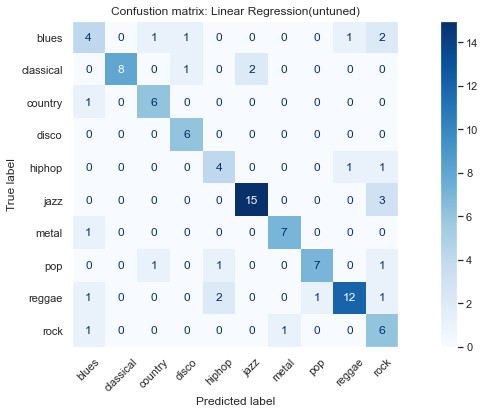

Accuracy : 0.75
Macro F-1 Score : 0.74


In [7]:
# Evaluate Model
class_labels = list(model_lr.classes_)
macro_f1, accuracy = evaluate_model(predsTestlr, y_test, class_labels, 'Confustion matrix: Linear Regression(untuned)')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Tuned

In [8]:
import random
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.linspace(0.1,100,5)}

print(parameters)

{'C': array([  0.1  ,  25.075,  50.05 ,  75.025, 100.   ])}


In [9]:
tune_lr = GridSearchCV(estimator=model_lr,param_grid=parameters,cv=5, verbose=10)
tune_lr.fit(X_dev, y_dev)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START C=0.1.......................................................
[CV 1/5; 1/5] END ........................C=0.1;, score=0.561 total time=   0.1s
[CV 2/5; 1/5] START C=0.1.......................................................
[CV 2/5; 1/5] END ........................C=0.1;, score=0.511 total time=   0.0s
[CV 3/5; 1/5] START C=0.1.......................................................
[CV 3/5; 1/5] END ........................C=0.1;, score=0.494 total time=   0.0s
[CV 4/5; 1/5] START C=0.1.......................................................
[CV 4/5; 1/5] END ........................C=0.1;, score=0.506 total time=   0.0s
[CV 5/5; 1/5] START C=0.1.......................................................
[CV 5/5; 1/5] END ........................C=0.1;, score=0.528 total time=   0.0s
[CV 1/5; 2/5] START C=25.075000000000003........................................
[CV 1/5; 2/5] END .........C=25.075000000000003;,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([  0.1  ,  25.075,  50.05 ,  75.025, 100.   ])},
             verbose=10)

In [10]:
print("Best Score :", tune_lr.best_score_)
print("Best Parameters :",tune_lr.best_params_)

Best Score : 0.7222222222222223
Best Parameters : {'C': 50.050000000000004}


In [11]:
predsDevlr_tuned = tune_lr.predict(X_dev)
predsTestlr_tuned = tune_lr.predict(X_test)

print("Score on Dev data for RF using GridSearchCV:", accuracy_score(y_dev, predsDevlr_tuned))
print("Score on Test data for RF using GridSearchCV:",accuracy_score(y_test, predsTestlr_tuned))

Score on Dev data for RF using GridSearchCV: 0.8455555555555555
Score on Test data for RF using GridSearchCV: 0.72


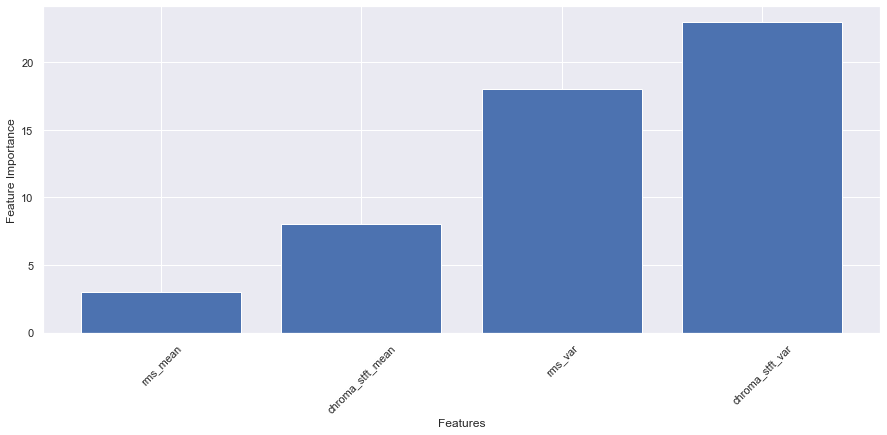

In [14]:
import numpy as np
feature_imp_lr = tune_lr.best_estimator_.coef_[0]
top_four = np.argpartition(feature_imp_lr, -4)[-4:]
top_four_sorted=top_four[np.argsort(feature_imp_lr[top_four])]

final_list_lr = zip(top_four_sorted,X_dev.columns)
res_lr = sorted(final_list_lr, key = lambda x: x[0])

plt.bar(range(len(res_lr)),[val[0] for val in res_lr],align='center')
plt.xticks(range(len(res_lr)),[val[1] for val in res_lr])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()

In [15]:
# Principal Component Analysis 
### cite : https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

# create the PCA instance
pca = PCA(n_components=30)
# fit on data
pca_data = pca.fit_transform(X_dev)
pca_data_test = pca.transform(X_test)
# pca_data_dev = pca.transform(X_dev)
PCA_df= pd.DataFrame(data=pca_data)
y_dev.index = PCA_df.index
pca_final=pd.concat([PCA_df,y_dev], axis = 1)
# access values
print("Explained Variance of each component:",pca.explained_variance_)
print("Sum of Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance of each component: [0.27462107 0.16378828 0.106374   0.0723295  0.05484226 0.0387792
 0.02690359 0.02395643 0.02175637 0.01846612 0.01427943 0.01395746
 0.0120279  0.01112264 0.01017839 0.00968102 0.00884285 0.0079686
 0.00769755 0.00724504 0.00710439 0.00655222 0.0060014  0.0056885
 0.00541432 0.00495666 0.00484587 0.00469017 0.0045146  0.00421289]
Sum of Explained Variance: 0.9526503368014955


In [16]:
pca_final.head()

0         1         2         3         4         5         6  \
0  0.000578 -0.630373 -0.054837  0.410234  0.009388  0.027372 -0.032693   
1  0.071451 -0.402465 -0.106785  0.332658 -0.060422  0.226590  0.122802   
2 -0.047268  0.326820 -0.598692  0.227380  0.045609  0.264122 -0.077907   
3 -0.437642  0.235405 -0.003960  0.029110 -0.170677 -0.094826 -0.142893   
4 -0.849344  0.103658 -0.048105 -0.018132 -0.023246 -0.159358  0.035769   

          7         8         9  ...        21        22        23        24  \
0 -0.147326  0.031380  0.111809  ...  0.076571  0.101436 -0.079348  0.038379   
1 -0.066842  0.069258 -0.088953  ...  0.119130  0.093535 -0.017702  0.096036   
2  0.063581 -0.168400  0.038901  ... -0.087692  0.044410 -0.056943 -0.029807   
3  0.105728  0.099778 -0.181429  ...  0.021234 -0.012892  0.027793  0.055065   
4 -0.071899  0.111846  0.102866  ...  0.040664 -0.009185  0.014699 -0.031403   

         25        26        27        28        29      label  
0 -0.003973 -0.018925  0.122862  0.060625  0.040025  classical  
1  0.006067 -0.110179 -0.027225 -0.006772  0.000226       jazz  
2  0.011730  0.089465 -0.022179  0.156436 -0.050286    country  
3  0.131690  0.101061  0.087083  0.037223  0.065070      metal  
4  0.035991  0.011660 -0.041380 -0.009164  0.023270      disco  

[5 rows x 31 columns]

In [17]:
model_pca = LogisticRegression()
model_pca.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainlr = model_pca.predict(pca_data)
pcaTestlr = model_pca.predict(pca_data_test)

In [18]:
pcatestlr_score =  accuracy_score(y_test, pcaTestlr)
pcalr_score = accuracy_score(y_dev, pcaTrainlr)

In [19]:
print("Classification Score for Linear Regression on Train dataset:\n")
print("Train Score : ", pcalr_score)
print("--------------------------------------------------------")
print("Classification Score for Linear Regression on Test dataset:\n")
print("Test Score :", pcatestlr_score)

Classification Score for Linear Regression on Train dataset:

Train Score :  0.7133333333333334
--------------------------------------------------------
Classification Score for Linear Regression on Test dataset:

Test Score : 0.72


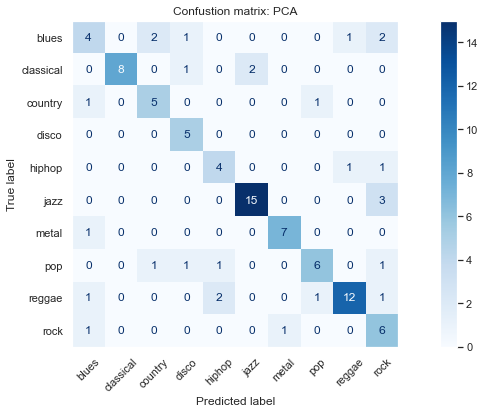

Accuracy : 0.72
Macro F-1 Score : 0.71


In [20]:
# Evaluate Model
class_labels = list(model_pca.classes_)
macro_f1, accuracy = evaluate_model(pcaTestlr, y_test, class_labels, 'Confustion matrix: PCA')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Tuned PCA model 

In [21]:
pca_final.iloc[:,:30]

0         1         2         3         4         5         6   \
0    0.000578 -0.630373 -0.054837  0.410234  0.009388  0.027372 -0.032693   
1    0.071451 -0.402465 -0.106785  0.332658 -0.060422  0.226590  0.122802   
2   -0.047268  0.326820 -0.598692  0.227380  0.045609  0.264122 -0.077907   
3   -0.437642  0.235405 -0.003960  0.029110 -0.170677 -0.094826 -0.142893   
4   -0.849344  0.103658 -0.048105 -0.018132 -0.023246 -0.159358  0.035769   
..        ...       ...       ...       ...       ...       ...       ...   
895 -0.654431  0.218151  0.332880  0.090825  0.133881 -0.215552  0.054109   
896  0.515280 -0.634698  0.082394  0.485203 -0.101831 -0.139826 -0.145431   
897  0.976786  0.902560  0.595924  0.289104  0.483065  0.202643  0.115372   
898  0.124804  0.297352 -0.452053 -0.032074  0.037626  0.157138 -0.016187   
899  0.450970  0.022880 -0.401623  0.147816 -0.331352  0.127981 -0.007134   

           7         8         9   ...        20        21        22  \
0   -0.147326  0.031380  0.111809  ... -0.184349  0.076571  0.101436   
1   -0.066842  0.069258 -0.088953  ...  0.120011  0.119130  0.093535   
2    0.063581 -0.168400  0.038901  ... -0.009481 -0.087692  0.044410   
3    0.105728  0.099778 -0.181429  ... -0.129103  0.021234 -0.012892   
4   -0.071899  0.111846  0.102866  ... -0.059072  0.040664 -0.009185   
..        ...       ...       ...  ...       ...       ...       ...   
895  0.024756  0.233049 -0.024789  ...  0.274371 -0.019833  0.088125   
896  0.177585  0.022334  0.179423  ...  0.032610 -0.015157 -0.008278   
897  0.003244 -0.108640 -0.320622  ...  0.043831  0.007613 -0.011208   
898 -0.012219 -0.084180  0.132896  ...  0.118006 -0.044531  0.002781   
899 -0.183297  0.021888  0.023211  ... -0.063965  0.025984  0.057043   

           23        24        25        26        27        28        29  
0   -0.079348  0.038379 -0.003973 -0.018925  0.122862  0.060625  0.040025  
1   -0.017702  0.096036  0.006067 -0.110179 -0.027225 -0.006772  0.000226  
2   -0.056943 -0.029807  0.011730  0.089465 -0.022179  0.156436 -0.050286  
3    0.027793  0.055065  0.131690  0.101061  0.087083  0.037223  0.065070  
4    0.014699 -0.031403  0.035991  0.011660 -0.041380 -0.009164  0.023270  
..        ...       ...       ...       ...       ...       ...       ...  
895 -0.033000 -0.048754 -0.003634 -0.085206 -0.004992 -0.001078  0.014238  
896 -0.114437 -0.059964 -0.183624 -0.016023  0.004205 -0.055580 -0.036738  
897 -0.013290 -0.029317 -0.124664 -0.038335  0.004592  0.077673  0.055427  
898  0.032850  0.040517 -0.126615  0.084490  0.037613  0.037489 -0.077576  
899  0.060661  0.064251 -0.040309 -0.050688 -0.061767  0.010609  0.038641  

[900 rows x 30 columns]

In [22]:
model_pca_tuned = tune_lr
model_pca_tuned.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainlr_tuned = model_pca_tuned.predict(pca_data)
pcaTestlr_tuned = model_pca_tuned.predict(pca_data_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START C=0.1.......................................................
[CV 1/5; 1/5] END ........................C=0.1;, score=0.550 total time=   0.0s
[CV 2/5; 1/5] START C=0.1.......................................................
[CV 2/5; 1/5] END ........................C=0.1;, score=0.511 total time=   0.0s
[CV 3/5; 1/5] START C=0.1.......................................................
[CV 3/5; 1/5] END ........................C=0.1;, score=0.483 total time=   0.0s
[CV 4/5; 1/5] START C=0.1.......................................................
[CV 4/5; 1/5] END ........................C=0.1;, score=0.511 total time=   0.0s
[CV 5/5; 1/5] START C=0.1.......................................................
[CV 5/5; 1/5] END ........................C=0.1;, score=0.511 total time=   0.0s
[CV 1/5; 2/5] START C=25.075000000000003........................................
[CV 1/5; 2/5] END .........C=25.075000000000003;,

In [23]:
pcatestlr_score_tuned =  accuracy_score(y_test, pcaTestlr_tuned)
pcalr_score_tuned = accuracy_score(y_dev, pcaTrainlr_tuned)

In [24]:
print("Classification Score for Linear Regression on Train dataset:\n")
print("Train Score : ", pcalr_score_tuned)
print("--------------------------------------------------------")
print("Classification Score for Linear Regression on Test dataset:\n")
print("Test Score :", pcatestlr_score_tuned)

Classification Score for Linear Regression on Train dataset:

Train Score :  0.7977777777777778
--------------------------------------------------------
Classification Score for Linear Regression on Test dataset:

Test Score : 0.77


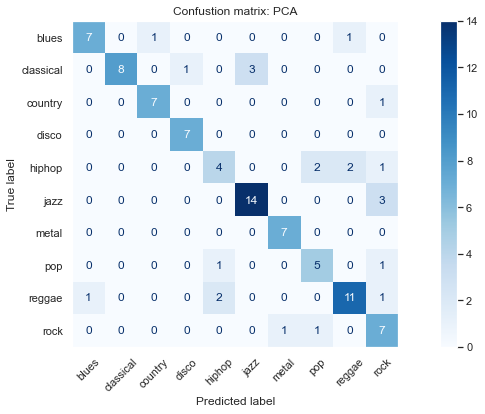

Accuracy : 0.77
Macro F-1 Score : 0.77


In [25]:
# Evaluate Model
class_labels = list(model_pca_tuned.classes_)
macro_f1, accuracy = evaluate_model(pcaTestlr_tuned, y_test, class_labels, 'Confustion matrix: PCA')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)